The Quantum Fourier Transform maps state $\ket{x} \rightarrow \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n (\ket{0} + e^{\frac{2\pi i x}{2^k}}\ket{1})$

Prepare a $k=0$ state by applying $H$ gates to all qubits at start - succesful QFT should map this to the all $0$ state

     ┌───┐                             ░                       ░               »
q_0: ┤ H ├──────■──────────────────────░───────■───────────────░───────■───────»
     ├───┤      │                      ░       │               ░ ┌───┐ │P(π/4) »
q_1: ┤ H ├──────┼──────■───────────────░───────┼────────■──────░─┤ H ├─■───────»
     ├───┤      │      │               ░ ┌───┐ │P(π/2)  │P(π)  ░ └───┘         »
q_2: ┤ H ├──────┼──────┼───────■───────░─┤ H ├─■────────■──────░───────────────»
     ├───┤┌───┐ │P(π)  │P(2π)  │P(4π)  ░ └───┘                 ░               »
q_3: ┤ H ├┤ H ├─■──────■───────■───────░───────────────────────░───────────────»
     └───┘└───┘                        ░                       ░               »
«      ░ ┌───┐ ░       
«q_0: ─░─┤ H ├─░──X────
«      ░ └───┘ ░  │    
«q_1: ─░───────░──┼──X─
«      ░       ░  │  │ 
«q_2: ─░───────░──┼──X─
«      ░       ░  │    
«q_3: ─░───────░──X────
«      ░       ░       

Total counts are: {'0000': 1000}


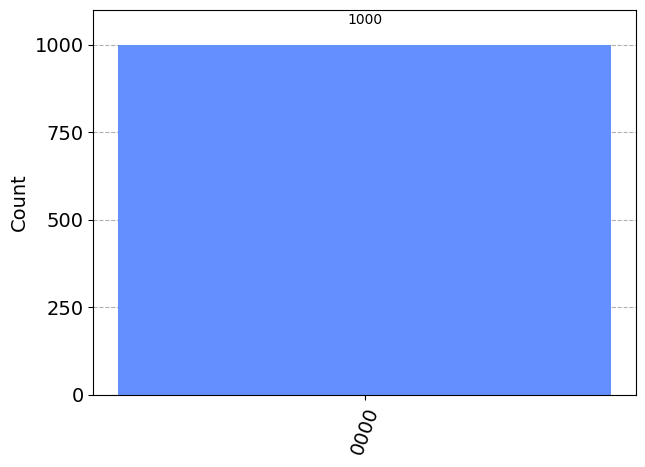

In [19]:
from numpy import pi

from qiskit import QuantumCircuit, transpile

# For older versions of qiskit import Aer

# For newer versions of qiskit must import qiskit_aer

from qiskit_aer import AerSimulator


# If we instead wanted to make a noisy simulation we could use the following

#from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_histogram

# Number of qubits
n = 4 

# Create a Quantum Circuit
qc = QuantumCircuit(n)

# Apply H-gate to each qubit:
for qubit in range(n):
    qc.h(qubit)

# Apply the controlled-R_k gates:
for target_qubit in range(n):
    qc.h(n- 1 - target_qubit)
    for control_qubit in range(n-1-target_qubit):
        qc.cp(pi/2**(target_qubit-control_qubit), control_qubit, n-1- target_qubit)
    qc.barrier()

# Swap the qubits (optional)
for i in range(n//2):
    qc.swap(i, n-1-i)


# Display the circuit
print(qc)

qc.measure_all()

# Use Aer's qasm_simulator in older versions of qiskit
# simulator = Aer.get_backend('aer_simulator')

# In newer versions of qiskit use AerSimulator 

simulator = AerSimulator()

# Execute the circuit on the qasm simulator
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

# If we wanted to simulate the circuit with noise we could use the following

# Construct a simulator using a noise model
# from a real backend.
#provider = QiskitRuntimeService()
#backend = provider.get_backend("ibm_kyoto")
#aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
#result_noise = aersim_backend.run(compiled_circuit).result()
#counts_noise = result_noise.get_counts(0)

#print('Counts(noise):', counts_noise)